In [1]:
# импорт нужных библиотек
import pandas as pd
import matplotlib.pyplot as plt
from typing import List, Dict

In [2]:
# заведем константу для пути к файлу
FILE_PATH = 'data.csv'

In [3]:
# заведем класс с необходимыми фукнциями
class Sales:
    def __init__(self, path: str) -> None:
        self.path = path

    def __read_and_prepare_data(self) -> None:
        '''
        Фукнция читает файл по пути в датафрейм,
        а также добавляет столбец с суммами продаж
        '''
        try:
            self.df = pd.read_csv(self.path)
            self.df['total'] = self.df['quantity'] * self.df['price']
        except:
            raise Exception('Something is wrong. Check the file or path')
        
    def __validate_attr(self) -> None:
        '''
        Фукнция валидирует наличие загруженных и
        подготовленных данных
        '''
        if not hasattr(self, 'df'):
            self.__read_and_prepare_data()
        
    def read_sales_data(self) -> List[Dict]:
        '''
        Фукнция возвращает список всех продаж

        :return: список продаж со словарями
        '''
        self.__validate_attr()
        return self.df.to_dict('records')
    
    def total_sales_per_product(self) -> Dict:
        '''
        Фукнция возвращает сумму продаж для каждого продукта

        :return: словарь с продуктами и суммами
        '''
        self.__validate_attr()
        return self.df.groupby('product_name')['total'].sum().to_dict()
    
    def sales_over_time(self) -> Dict:
        '''
        Фукнция возвращает сумму продаж для каждой даты

        :return: словарь с продуктами и датами
        '''
        self.__validate_attr()
        return self.df.groupby('date')['total'].sum().to_dict()
    
    def max_sales_on_date_or_product(self) -> str:
        '''
        Фукнция находит товар, принесший больше денег и
        дата, где была самая большая выручка

        :return: строка с найденными значениями
        '''
        self.__validate_attr()
        agg_products = self.total_sales_per_product(self)
        agg_dates = self.sales_over_time(self)
        most_useful_product = max(agg_products, key=agg_products.get)
        most_productive_day = max(agg_dates, key=agg_dates.get)
        return f'Товар, принесший максимальную выручку: {most_useful_product}. \
                Дата с максимальной выручкой: {most_productive_day}'
    

In [4]:
# создадим экземпляр класса
sales = Sales(FILE_PATH)

In [5]:
# проверяем фукнцию получения списка словарей продаж
all_sales = sales.read_sales_data()
all_sales

[{'product_name': 'яблоки',
  'quantity': 10,
  'price': 15,
  'date': '2024-06-21',
  'total': 150},
 {'product_name': 'груши',
  'quantity': 16,
  'price': 11,
  'date': '2024-06-22',
  'total': 176},
 {'product_name': 'сливы',
  'quantity': 20,
  'price': 15,
  'date': '2024-06-19',
  'total': 300},
 {'product_name': 'печенье',
  'quantity': 6,
  'price': 23,
  'date': '2024-06-20',
  'total': 138},
 {'product_name': 'сливы',
  'quantity': 21,
  'price': 15,
  'date': '2024-06-16',
  'total': 315},
 {'product_name': 'яблоки',
  'quantity': 6,
  'price': 5,
  'date': '2024-06-20',
  'total': 30},
 {'product_name': 'конфеты Рот-Фронт',
  'quantity': 11,
  'price': 22,
  'date': '2024-06-24',
  'total': 242},
 {'product_name': 'сливы',
  'quantity': 6,
  'price': 15,
  'date': '2024-06-20',
  'total': 90}]

In [6]:
# проверяем функцию получения суммы продаж всех продуктов
total_sales_products = sales.total_sales_per_product()
total_sales_products

{'груши': 176,
 'конфеты Рот-Фронт': 242,
 'печенье': 138,
 'сливы': 705,
 'яблоки': 180}

In [7]:
# проверяем фукнцию получчения суммы продаж для всех дат
total_sales_date = sales.sales_over_time()
total_sales_date

{'2024-06-16': 315,
 '2024-06-19': 300,
 '2024-06-20': 258,
 '2024-06-21': 150,
 '2024-06-22': 176,
 '2024-06-24': 242}

Text(0.5, 1.0, 'График суммы продаж для каждого товара')

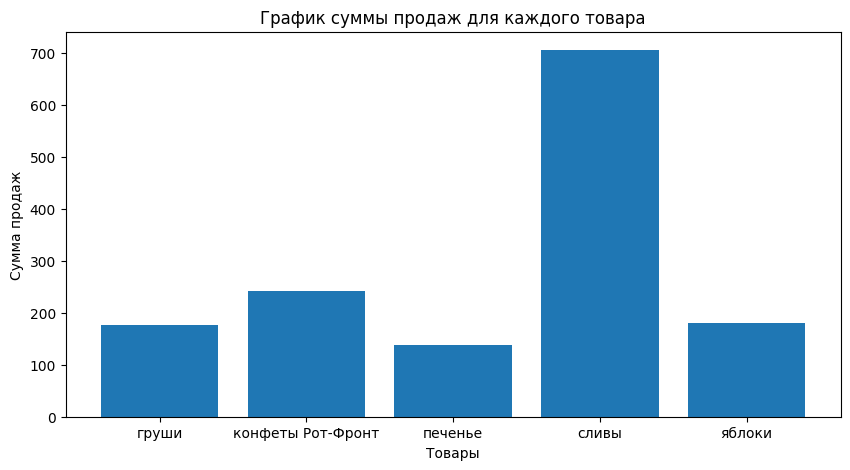

In [8]:
# строим столбчатую диаграмму отношения продуктов и суммы их продаж
plt.figure(figsize=(10,5))
plt.bar(total_sales_products.keys(), total_sales_products.values())
plt.ylabel('Сумма продаж')
plt.xlabel('Товары')
plt.title('График суммы продаж для каждого товара')

Text(0.5, 1.0, 'График суммы продаж по датам')

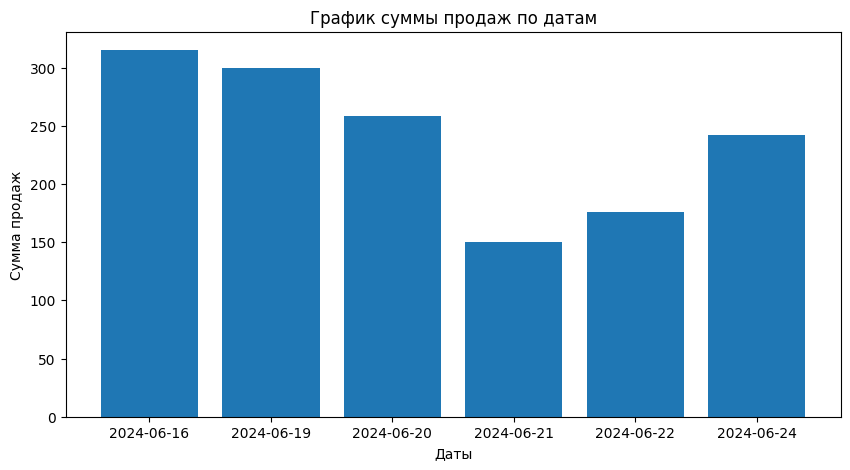

In [9]:
# строим столбчатую диаграмму отношения дат и суммы их продаж
plt.figure(figsize=(10,5))
plt.bar(total_sales_date.keys(), total_sales_date.values())
plt.ylabel('Сумма продаж')
plt.xlabel('Даты')
plt.title('График суммы продаж по датам')